# [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)

An introduction to PyTorch taken from the pytorch beginner tutorials.

Using the FashionMNIST dataset to train a classification NN.

## Tensors
Tensors are specil data structures similar to arrays and matrices (they're basically N-dimensional matrices). Pytorch uses these to encode input/outputs and model params.

In [3]:
import torch
import numpy as np

### Initialising a Tensor

In [4]:
# Directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [5]:
# From numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [6]:
# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9266, 0.2787],
        [0.4596, 0.0025]]) 



In [9]:
# With random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5464, 0.3152, 0.0536],
        [0.7226, 0.0231, 0.3332]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Atrributes of a Tensor
These describe the tensor's shape, dtype and device

In [10]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors
All tensor ops can be run on the GPU. By default tensors are created on the CPU and must be explicitly moved to the GPU using the `.to` method. This can be time/memory intensive.

In [14]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')


In [16]:
# Standard NP indexing/slicing
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:, 1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [19]:
# Joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [20]:
# Arithmetic Operations
# This computes the matrix multiplication between two tensors. 
# y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. 
# z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [25]:
# Single element tensors
# using .item() converts a single element tensor to a python number
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [28]:
# In-place opes store result in place and are denoted by a `_` suffix
# They sevae some memory but can cause issues with derivatives, their use is discouraged.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]]) 

tensor([[16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.],
        [16., 15., 16., 16.]])


### Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their memory location, changing one will change the other.

In [30]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Datasets and Dataloaders
Code for processing data samples can get messy and hard to maintain (even with these tools). However we want to decouple training code from datasets handling.

Dataloaders and Datasets allow us to use preloaded datasets and our own data. *Dataset* stores the samples and their labels, *Dataloader* wraps an iterable around the *dataset* to enable easy access to samples.

Pytorch provides a number of datasets that are preloaded and can be used to prototype and benchmark models.

### Loading a dataset
We will work with the [Fashin-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
- num_train_samples = 60k
- num_test_samples = 10k
- num_classes = 10
- image_shape = (1,28,28) i.e. 28x28 grayscale

We use the following parameters to load the dataset:
- `root` is the path to the data
- `train` specifics the train/test set
- `download=true` downloads the data if not available at root
- `transform` and `target_transform` specify the feature and label transformations



In [33]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualising the Dataset
Datasets can be indexed manually like a list: `training_data[index]` and visualised using `matplotlib`.

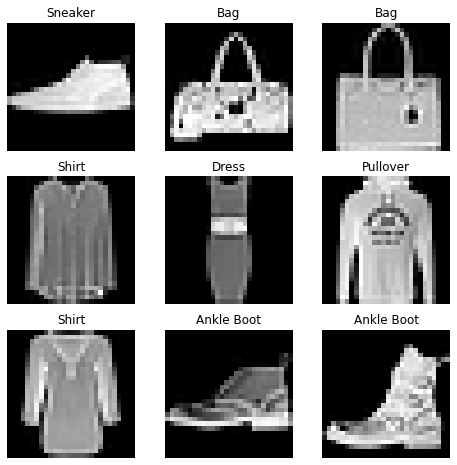

In [41]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img,label = training_data[sample_idx]
    
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
